<a href="https://colab.research.google.com/github/changsksu/IMSE_Data_Science/blob/main/EWMA_Control_Chart_using_pyspc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code demonstrates how you can plot EWMA Control Chart.
Note that this code should work for the Phase I & II of control charting.
The example data set has n=5; however, it is converted into n=1.
Example 6-1 from Montgomery Intro to SQC 7ed
Ref. https://github.com/carlosqsilva/pyspc

In [ ]:
!pip install pyspc==0.4

  Created wheel for pyspc: filename=pyspc-0.4-py3-none-any.whl size=30874 sha256=2ba07090d004069e2153f9908a5fa18a1e38acd382a2d699bd054249c537d572
  Stored in directory: /root/.cache/pip/wheels/1d/44/7a/6e67f7829fdbfd1e005ebaeb96ba96499d08af1d92c58d73d7
Successfully built pyspc


In [ ]:
# Import required libraries
from pyspc import *
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import pandas as pd
plt.style.use('seaborn-colorblind')

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# retrive data for Example 6.1
data = pd.read_csv('drive/My Drive/Colab Notebooks/IMSE_Data_Science/Data/ch06example1.csv', sep=',', na_values=".")
#generate the Phase I data using filter
#use the first 30 observations to setup the control charts
dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] < 31]]
#dataI= [data[['x1', 'x2', 'x3', 'x4','x5']][data[0:31]]

#retrieve the Phase II data
dataII= [data[['x1', 'x2', 'x3', 'x4','x5']][data['Exm6-1Samp'] >= 31]]

#all data points; the data type is a list
dataAll=[data[['x1', 'x2', 'x3', 'x4','x5']]]

dataI

[        x1      x2      x3      x4      x5
 0   1.3235  1.4128  1.6744  1.4573  1.6914
 1   1.4314  1.3592  1.6075  1.4666  1.6109
 2   1.4284  1.4871  1.4932  1.4324  1.5674
 3   1.5028  1.6352  1.3841  1.2831  1.5507
 4   1.5604  1.2735  1.5265  1.4363  1.6441
 5   1.5955  1.5451  1.3574  1.3281  1.4198
 6   1.6274  1.5064  1.8366  1.4177  1.5144
 7   1.4190  1.4303  1.6637  1.6067  1.5519
 8   1.3884  1.7277  1.5355  1.5176  1.3688
 9   1.4039  1.6697  1.5089  1.4627  1.5220
 10  1.4158  1.7667  1.4278  1.5928  1.4181
 11  1.5821  1.3355  1.5777  1.3908  1.7559
 12  1.2856  1.4106  1.4447  1.6398  1.1928
 13  1.4951  1.4036  1.5893  1.6458  1.4969
 14  1.3589  1.2863  1.5996  1.2497  1.5471
 15  1.5747  1.5301  1.5171  1.1839  1.8662
 16  1.3680  1.7269  1.3957  1.5014  1.4449
 17  1.4163  1.3864  1.3057  1.6210  1.5573
 18  1.5796  1.4185  1.6541  1.5116  1.7247
 19  1.7106  1.4412  1.2361  1.3820  1.7601
 20  1.4371  1.5051  1.3485  1.5670  1.4880
 21  1.4738  1.5936  1.6583  1.4

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x=np.reshape(dataI, (30,5))
x

array([[1.3235, 1.4128, 1.6744, 1.4573, 1.6914],
       [1.4314, 1.3592, 1.6075, 1.4666, 1.6109],
       [1.4284, 1.4871, 1.4932, 1.4324, 1.5674],
       [1.5028, 1.6352, 1.3841, 1.2831, 1.5507],
       [1.5604, 1.2735, 1.5265, 1.4363, 1.6441],
       [1.5955, 1.5451, 1.3574, 1.3281, 1.4198],
       [1.6274, 1.5064, 1.8366, 1.4177, 1.5144],
       [1.419 , 1.4303, 1.6637, 1.6067, 1.5519],
       [1.3884, 1.7277, 1.5355, 1.5176, 1.3688],
       [1.4039, 1.6697, 1.5089, 1.4627, 1.522 ],
       [1.4158, 1.7667, 1.4278, 1.5928, 1.4181],
       [1.5821, 1.3355, 1.5777, 1.3908, 1.7559],
       [1.2856, 1.4106, 1.4447, 1.6398, 1.1928],
       [1.4951, 1.4036, 1.5893, 1.6458, 1.4969],
       [1.3589, 1.2863, 1.5996, 1.2497, 1.5471],
       [1.5747, 1.5301, 1.5171, 1.1839, 1.8662],
       [1.368 , 1.7269, 1.3957, 1.5014, 1.4449],
       [1.4163, 1.3864, 1.3057, 1.621 , 1.5573],
       [1.5796, 1.4185, 1.6541, 1.5116, 1.7247],
       [1.7106, 1.4412, 1.2361, 1.382 , 1.7601],
       [1.4371, 1.50

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x1=x.flatten()

In [ ]:
# process mean is computed assuming it is stationary
x1.mean()

1.503744

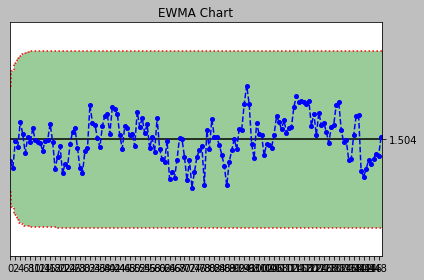

<pyspc: (8764245385609)>


In [ ]:
a=spc(x1) + ewma()
print(a)

# **Now we will use the mean and sigma estimated from the Phase I process above and plot all data**

In [ ]:
# this np.reshape convert the list dataI into the proper subgroup and m=30
# sample size n=5 is used for X-bar and R or X-bar and S chart
x2=np.reshape(dataAll, (45,5))
#x2

In [ ]:
# np flattern() function is used to convert a 2D matrix into 1D vector
# n=1 is use for EWMA chart
x2=x2.flatten()

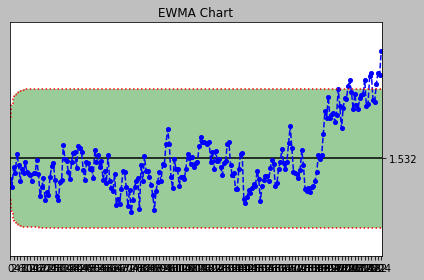

<pyspc: (8764240830353)>


In [ ]:
b=spc(x2) + ewma()
print(b)

Your turn: how do you control the mean and std so that only the Phase I data is used?

Other charts such as Xbar/S, Xbar/R are possible; e.g. c=spc(x1) + xbar_rbar()
Ref. https://github.com/carlosqsilva/pyspc

Also there is GUI for choosing varous chart
$ python3 pyspc_gui.py
Also SPC Online: https://carlosqsilva.github.io/ccharts-online/
